In [36]:
import pandas as pd
import numpy as np
import glob

file_path = 'data/*.xlsx'

files = glob.glob(file_path)
data = [
    [(sheet, pd.ExcelFile(file).parse(sheet)) 
     for sheet in pd.ExcelFile(file).sheet_names
    ] 
    for file in files
]

In [39]:
key = ["Rbr.županije", "Grad/općina/država", "Rbr BM"]

value = ["Županija", "Oznaka Gr/Op/Dr", "Naziv BM", 
         "Lokacija BM", "Adresa BM", "Ukupno birača", "Glasovalo birača", 
         "Glasovalo birača (po listićima)", "Nevažeći listići", "Važeći listići"]

main_page = "rezultati"

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
import matplotlib.pyplot as plt

# Define the get_coordinates function with error handling and retry logic
def get_coordinates(address):
    geolocator = Photon(user_agent="ProjektR-Test_310523")
    try:
        location = geolocator.geocode(address)
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error: {e}, retrying...")
        time.sleep(1)
        return get_coordinates(address)


class IJ:
    def __init__ (self, data):
        self.data = dict(data)
        self.rez = self.data[main_page]
        
        self.sheet_names, self.sheets = zip(*data)
        self.selected = 0
        
        self.rez["Coordinates"] = (
            self.rez['Adresa BM'] + " " + self.rez['Grad/općina/država'] + ' Croatia'
        ).apply(get_coordinates)
                
        self.rez[['Latitude', 'Longitude']] = pd.DataFrame(self.rez['Coordinates'].tolist(), index=self.rez.index)

    def select_sheet(self, sheet):
        for i in range(len(self.sheet_names)):
            if (self.sheet_names[i] == sheet):
                self.selected = i
                return
        raise Exception("No sheet by the name " + sheet + " sheet names are: ", self.sheet_names)
        
    def select_sheeti(self, sheet):
        if (sheet >= len(self.sheet_names)):
            raise Exception("Index ", sheet, " out of range for size ", len(self.sheet_names))
        else:
            self.selected = sheet
    
    def geti(self, indexes, i=None):
        return self.get(i).iloc[:, indexes]
        
    def gett(self, tags, i=None):
        return self.get(i)[tags]
        
    def get(self, i=None):
        return self.data[self.sheet_names[self.selected] if i is None else i]

data2 = [IJ(d) for d in data[:10]]

Error: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=RU%C4%8CA+BB+ORLE+Croatia&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='photon.komoot.io', port=443): Read timed out. (read timeout=1)")), retrying...
Error: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=GORNJI+LIPOV%C4%8CANI+30+%C4%8CAZMA+Croatia&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='photon.komoot.io', port=443): Read timed out. (read timeout=1)")), retrying...
Error: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=ZDEN%C4%8CEC+44+%C4%8CAZMA+Croatia&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='photon.komoot.io', port=443): Read timed out. (read timeout=1)")), retrying...
Error: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=POBJENIK+102+%C4%8CAZMA+Croatia&limit=1 (Caused by ReadTimeoutErr

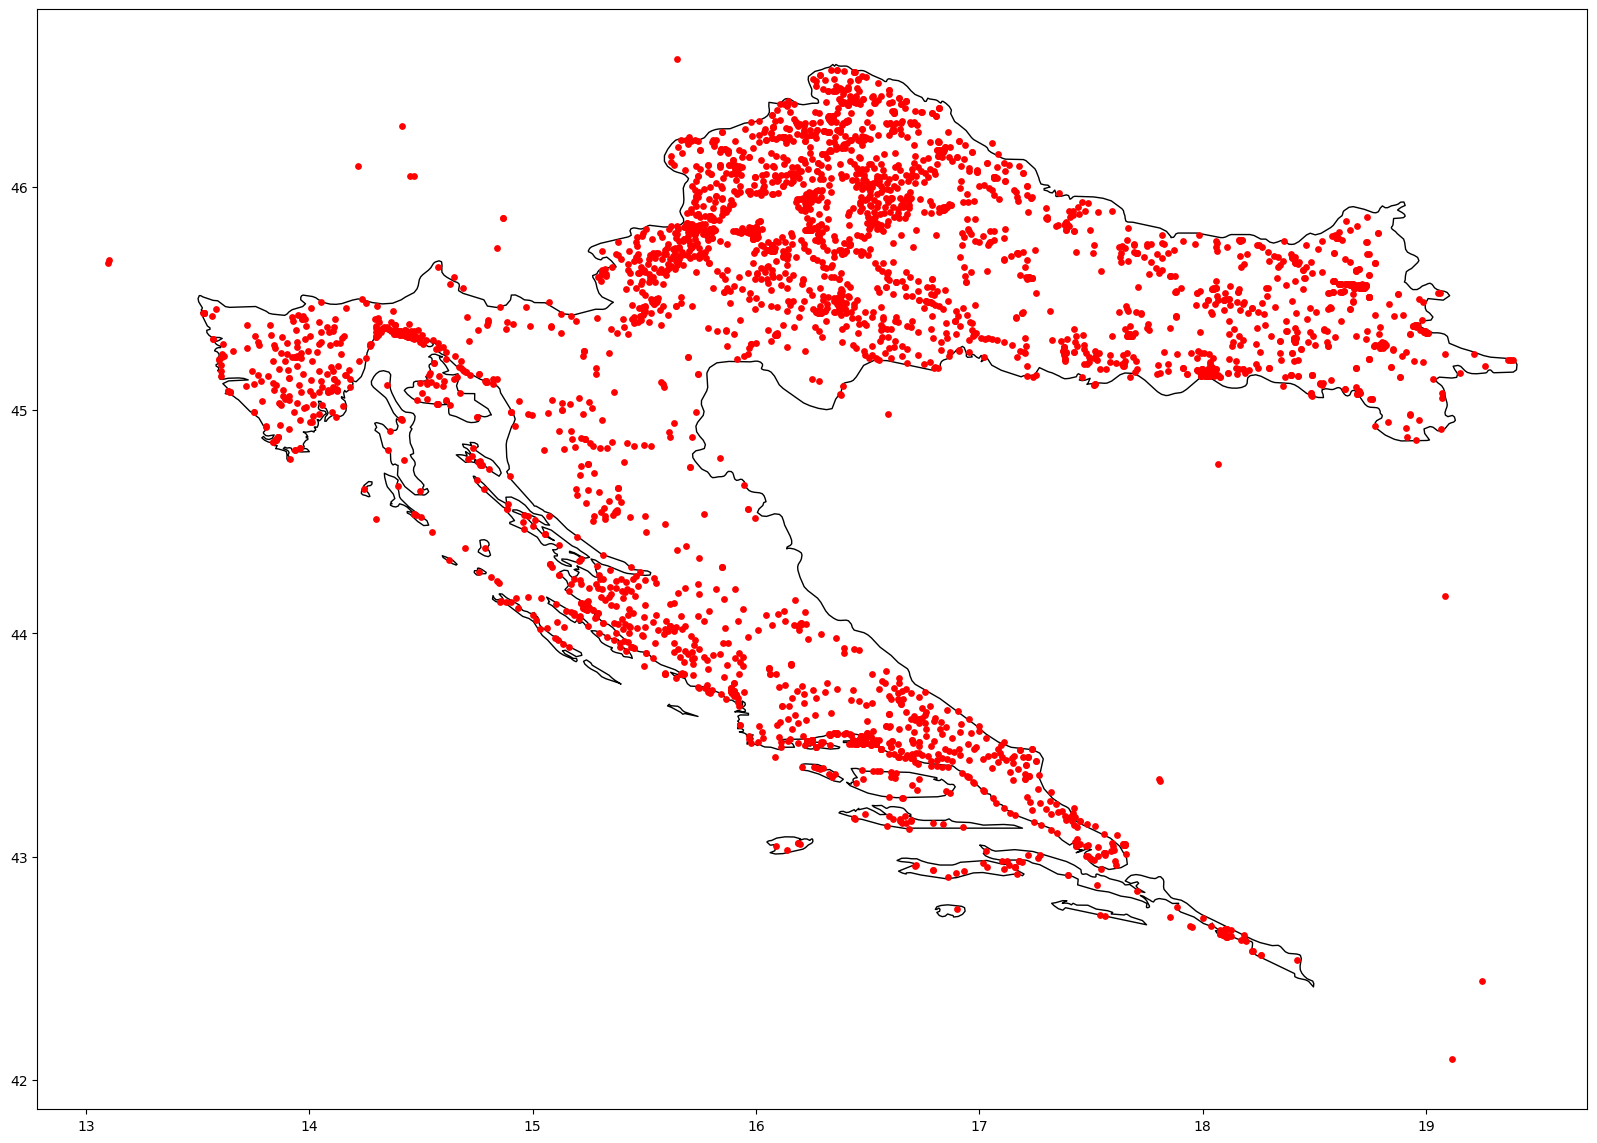

In [ ]:

data3 = [pd.ExcelFile("output.xlsx").parse(sheet) 
         for sheet in pd.ExcelFile("output.xlsx").sheet_names] 

ultradf = pd.concat([d[(d["Longitude"] <= 20) & (d["Longitude"] >= 13) & (d["Latitude"] <= 47) & (d["Latitude"] >= 42)] for d in data3[:10]])
gdf = gpd.GeoDataFrame(ultradf, geometry=gpd.points_from_xy(ultradf.Longitude, ultradf.Latitude))

# Load the map of Croatia
world = gpd.read_file('data/ne_10m_admin_0_countries.shp')

# Use the correct column name to filter for Croatia
croatia = world[world['ADMIN'] == "Croatia"]

# Plot the map of Croatia
fig, ax = plt.subplots(figsize=(20, 20))
croatia.plot(ax=ax, color='white', edgecolor='black')

# Plot the voting addresses
gdf.plot(ax=ax, color='red', markersize=15)

plt.show()

DataFrames have been exported to output.xlsx
